In [2]:
import os
import pandas as pd
import json
import monai
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import ast

 missing cuda symbols while dynamic loading
 cuFile initialization failed


# Validation

In [112]:

# Creating  tables
path = "/mnt/ceib/datalake/FISABIO_datalake/p0042021"
derivatives_path = "/mnt/ceib/datalake/FISABIO_datalake/p0042021/derivatives/creating_adc"
t2_list = []
adc_list = []
dwi_list = []

# Creating a list of all the files in the directory starting with sub-*
subjects = [f for f in os.listdir(path) if f.startswith("sub-")]
derivatives_subs = [f for f in os.listdir(derivatives_path) if f.startswith("sub-")]

for sub in subjects:
    derivative_sessions=None
    if sub in derivatives_subs:
        derivative_sessions = [f for f in os.listdir(os.path.join(derivatives_path, sub)) if f.startswith("ses-")]
    sessions = [f for f in os.listdir(os.path.join(path, sub)) if f.startswith("ses-")]
    for ses in sessions:
        # Check if the anat and dwi paths exist
        anat_path = os.path.join(path, sub, ses,'mim-mr','anat')
        dwi_path = os.path.join(path, sub, ses,'mim-mr','dwi')

        if os.path.exists(anat_path):
            images_anat = [f for f in os.listdir(anat_path) if f.endswith(".nii.gz")]
            for img in images_anat:
                if 'T2w' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','anat', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'T2w'}
                    img_dict.update(data)
                    t2_list.append(img_dict)
        if os.path.exists(dwi_path):
            images_dwi = [f for f in os.listdir(dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                if 'bvalue' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'dwi'}
                    img_dict.update(data)
                    dwi_list.append(img_dict)
                elif 'adc' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'adc'}
                    img_dict.update(data)
                    adc_list.append(img_dict)
    if derivative_sessions:
        for ses in derivative_sessions:
            der_dwi_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi')
            images_dwi = [f for f in os.listdir(der_dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                json_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                with open(json_path) as f:
                    data = json.load(f)
                #Add json data to the dict image
                img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'derivative/adc'}
                img_dict.update(data)
                adc_list.append(img_dict)


t2w_df = pd.DataFrame(t2_list)
dwi_df = pd.DataFrame(dwi_list)
adc_df = pd.DataFrame(adc_list)
#Formating the acquisition time as time
t2w_df['AcquisitionTime'] = pd.to_datetime(t2w_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time
dwi_df['AcquisitionTime'] = pd.to_datetime(dwi_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time
adc_df['AcquisitionTime'] = pd.to_datetime(adc_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time

In [425]:
adc_df.loc[adc_df["subject"]=="sub-000019"]

subject     session  \
392  sub-000019  ses-000019   
393  sub-000019  ses-000019   
394  sub-000019  ses-000019   

                                                 image        modality  \
392  sub-000019_ses-000019_acq-bvalue_run-9_bp-a_vp...  derivative/adc   
393  sub-000019_ses-000019_acq-bvalue_run-11_bp-a_v...  derivative/adc   
394  sub-000019_ses-000019_acq-bvalue_run-10_bp-a_v...  derivative/adc   

    AccessionNumber         AcquisitionDateTime  AcquisitionMatrixPE  \
392          000019  2012-12-27T16:53:46.000000                   64   
393          000019  2012-12-27T17:06:18.000000                   64   
394          000019  2012-12-27T16:59:19.000000                   64   

    AcquisitionTime BodyPartExamined  CoilString  ... PhaseEncodingSteps SAR  \
392        16:53:46         Prostate  HD Cardiac  ...                NaN NaN   
393        17:06:18         Prostate  HD Cardiac  ...                NaN NaN   
394        16:59:19         Prostate  HD Cardiac  ...                NaN NaN   

    AngioFlag  PartialFourier SequenceName  SliceTiming DeviceSerialNumber  \
392       NaN             NaN          NaN          NaN                NaN   
393       NaN             NaN          NaN          NaN                NaN   
394       NaN             NaN          NaN          NaN                NaN   

    InstitutionName StationName  VariableFlipAngleFlag  
392             NaN         NaN                    NaN  
393             NaN         NaN                    NaN  
394             NaN         NaN                    NaN  

[3 rows x 72 columns]

In [114]:
dwi_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000063  ses-000063   
3    sub-000066  ses-000066   
4    sub-000066  ses-000066   
..          ...         ...   
345  sub-000111  ses-000111   
346  sub-000111  ses-000111   
347  sub-000120  ses-000120   
348  sub-000120  ses-000120   
349  sub-000120  ses-000120   

                                                 image modality  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...      dwi   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...      dwi   
2    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...      dwi   
3    sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...      dwi   
4    sub-000066_ses-000066_acq-bvalue_run-12_bp-p_v...      dwi   
..                                                 ...      ...   
345  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...      dwi   
346  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...      dwi   
347  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...      dwi   
348  sub-000120_ses-000120_acq-bvalue_run-10_bp-a_v...      dwi   
349  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...      dwi   

    AccessionNumber         AcquisitionDateTime  AcquisitionMatrixPE  \
0            000063  2016-07-07T15:31:30.000000                   64   
1            000063   2016-07-07T15:37:3.000000                   64   
2            000063   2016-07-07T15:43:3.000000                   64   
3            000066  2017-01-27T16:02:40.000000                   64   
4            000066  2017-01-27T16:09:52.000000                   64   
..              ...                         ...                  ...   
345          000111  2015-06-24T20:11:17.000000                   64   
346          000111  2015-06-24T20:05:41.000000                   64   
347          000120  2014-09-24T08:39:13.000000                   64   
348          000120   2014-09-24T08:28:7.000000                   64   
349          000120  2014-09-24T08:33:40.000000                   64   

     AcquisitionNumber AcquisitionTime AngioFlag  ... WindowWidth  \
0                    1        15:31:30         N  ...        1712   
1                    1        15:37:03         N  ...         393   
2                    1        15:43:03         N  ...        2319   
3                    1        16:02:40         N  ...         183   
4                    1        16:09:52         N  ...        1884   
..                 ...             ...       ...  ...         ...   
345                  1        20:11:17         N  ...         166   
346                  1        20:05:41         N  ...         293   
347                  1        08:39:13         N  ...         255   
348                  1        08:28:07         N  ...         347   
349                  1        08:33:40         N  ...         392   

    BodyPartExamined InversionTime PhaseEncodingSteps  PartialFourier  \
0                NaN           NaN                NaN             NaN   
1                NaN           NaN                NaN             NaN   
2                NaN           NaN                NaN             NaN   
3                NaN           NaN                NaN             NaN   
4                NaN           NaN                NaN             NaN   
..               ...           ...                ...             ...   
345              NaN           NaN                NaN             NaN   
346              NaN           NaN                NaN             NaN   
347              NaN           NaN                NaN             NaN   
348              NaN           NaN                NaN             NaN   
349              NaN           NaN                NaN             NaN   

    RawImage  SequenceName SliceTiming PhaseEncodingDirection  \
0        NaN           NaN         NaN                    NaN   
1        NaN           NaN         NaN                    NaN   
2        NaN           NaN         NaN                    NaN   

In [170]:
adc_columns = [
    "Apparent Diffusion Coefficient (mm2/s)",
    "AXIAL DIFUSION PROSTATA b50_1400_ADC",
    "Exponential Apparent Diffusion Coefficient",
    "Dw EPI b0-150-1000 –1400_ADC",
    "resolve_diff_b50_1400_tra_p2_CALC_BVAL",
    "resolve_diff_b50_1400_tra_p2_ADC",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_CALC_BVAL",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_ADC",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_ADC",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_CALC_BVAL",
    "AXIAL DIFUSION GANGLIOS b50_800_CALC 1500_ADC",
    "dMAPA ADC",
    "dadc map",
    "Dw EPI b0-150-1000 -1400 PELVIS_ADC",
    "ADC (10^-6 mm²/s):Dec 02 2019 12-02-00 CET",
    "EEADC",
    "DADC",
    "Reg(9511/6,9511/750) ADC",
    "ep2d_diff_tra_b0_b1000_ADC",
    "DIFUSION EPI b0-800 PELVIS_ADC",
    "ADC (10^-6 mm²/s):Feb 17 2020 10-59-35 CET",
    "ADC (10^-6 mm²/s):Feb 17 2020 10-36-04 CET",
    "Reg(9511/250,9511/6) ADC_REGISTRADO",
    "AXIAL DIFUSION PROSTATA b50_400_1400_ADC",
    "ADC (10^-6 mm²/s):Dec 02 2019 11-24-07 CET",
    "Ax DWI B50-800 Pelvis",
    #Revisar#####################
    "AX DWI B800 PELVIS 24CORTES",
    "AX DWI B600 PELVIS 24CORTES",
    "AX DWI B600 PELVIS", 
    "AX DWI B1000 PELVIS 24CORTES",
    "DWI b800", 
    "Ax DWI b800 DIN IR",
    "DWI b1500 (NO ASSET)", 
    "Ax DWI B1400 LESION"
    
]


adc_not_usable = [
    "Exponential Apparent Diffusion Coefficient",
    "resolve_diff_b50_1400_tra_p2_CALC_BVAL",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_CALC_BVAL",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_CALC_BVAL",
    "EEADC",
    "Reg(9511/250,9511/6) ADC_REGISTRADO"
]


dwi_protocols = {
    "ax dif  b1000": (1000, 0),
    "ax dif b1500": (1500, 0),
    "ax dif 2000": (2000, 0),
    "Ax DWI b50-800 PELVIS": (800, 50),
    "ax dif b1000": (1000, 0),
    "Ax DWI b2000": (2000, 0),
    "AX DWI B1000": (1000, 0),
    "AX DWI B800": (800, 0),
    "Ax DWI b1500": (1500, 0),
    "DWI_EPI_SPAIR_TRA B2000": (0, 2000),  # Pattern change
    "ax dif b1000": (1000, 0),
    "ax dif  b1500": (1500, 0),
    #"DW_Synthetic: AXI PELVIS DWI B50-800": None,  # Single channel
    "AXI PELVIS DWI B50-800": (50, 800),  # Pattern change
    "ax dif b1800": (1800, 0),
    "AX DWI b1500": (1500, 0),
    "Ax DWI b1500 FOV22 PRUEBA": (1500, 0),
    "ep2d_diff_tra_b0_b1000": (0, 1000),  # Pattern change
    "ax DWI b2000": (2000, 0),
    "Ax DWI B50-800 Pelvis": (800, 50),
    "AX DWI B800 PELVIS 24CORTES": (800, 0),
    "AX DWI B600 PELVIS 24CORTES": (600, 0),
    "AX DWI B600 PELVIS": (600, 0),
    "DWI b1500 (NO ASSET)": (1500, 0),
    "Ax DWI B1400 LESION": (1400, 0),
}

In [212]:
import pandas as pd
from difflib import SequenceMatcher

# Function to calculate similarity between two strings
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Function to find the most similar string in a list to a target, with a threshold
def find_most_similar(target, candidates, threshold=0.3):
    most_similar = None
    highest_similarity = 0
    for candidate in candidates:
        sim = similarity(target, candidate)
        if sim > highest_similarity:
            highest_similarity = sim
            most_similar = candidate
    return most_similar if highest_similarity >= threshold else None

# Assigning 'adc' to sequence for similar ADC series descriptions
def assign_sequence_based_on_similarity(series_description):
    if find_most_similar(series_description, adc_columns):
        return 'adc'
    return None

# Determining usability based on series description similarity to non-usable ADC series
def is_usable(series_description):
    non_usable_match = find_most_similar(series_description, adc_not_usable)
    return non_usable_match is None


dwi_df['usable'] = dwi_df['SeriesDescription'].apply(is_usable)

# Applying the refined protocol association with similarity
dwi_df['protocol_association'] = dwi_df['SeriesDescription'].apply(lambda x: find_most_similar(x, dwi_protocols.keys()))
dwi_df['can_calculate_adc'] = dwi_df['protocol_association'].notnull()

In [213]:
#check protocol association None
dwi_df[dwi_df['protocol_association'].isnull()]['SeriesDescription'].unique()

array([], dtype=object)

In [214]:
dwi_df[dwi_df['SeriesDescription']== 'resolve_diff_b50_1400_tra_p2_CALC_BVAL']['protocol_association']

111    ep2d_diff_tra_b0_b1000
Name: protocol_association, dtype: object

In [215]:
t2w_axial = t2w_df[t2w_df.apply(lambda x: 'ax' in x['image'], axis=1)].reset_index(drop=True)

In [119]:

index=1
t2w_image_path = os.path.join(path, t2w_axial.subject[index], t2w_axial.session[index],'mim-mr','anat', t2w_axial.image[index])
dwi_image_path = os.path.join(path, dwi_df.subject[index], dwi_df.session[index],'mim-mr','dwi', dwi_df.image[index])

print(t2w_image_path)
print(dwi_image_path)

t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)

print(t2w_image.shape)
print(dwi_image.shape)

print(t2w_df['AcquisitionDateTime'][index])
print(dwi_df['AcquisitionDateTime'][index])

/mnt/ceib/datalake/FISABIO_datalake/p0042021/sub-000063/ses-000063/mim-mr/anat/sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax_T2w.nii.gz
/mnt/ceib/datalake/FISABIO_datalake/p0042021/sub-000063/ses-000063/mim-mr/dwi/sub-000063_ses-000063_acq-bvalue_run-14_bp-p_vp-ax_dwi.nii.gz
torch.Size([1, 512, 512, 28])
torch.Size([2, 256, 256, 28])
2016-07-07T15:02:32.000000
2016-07-07T15:37:3.000000


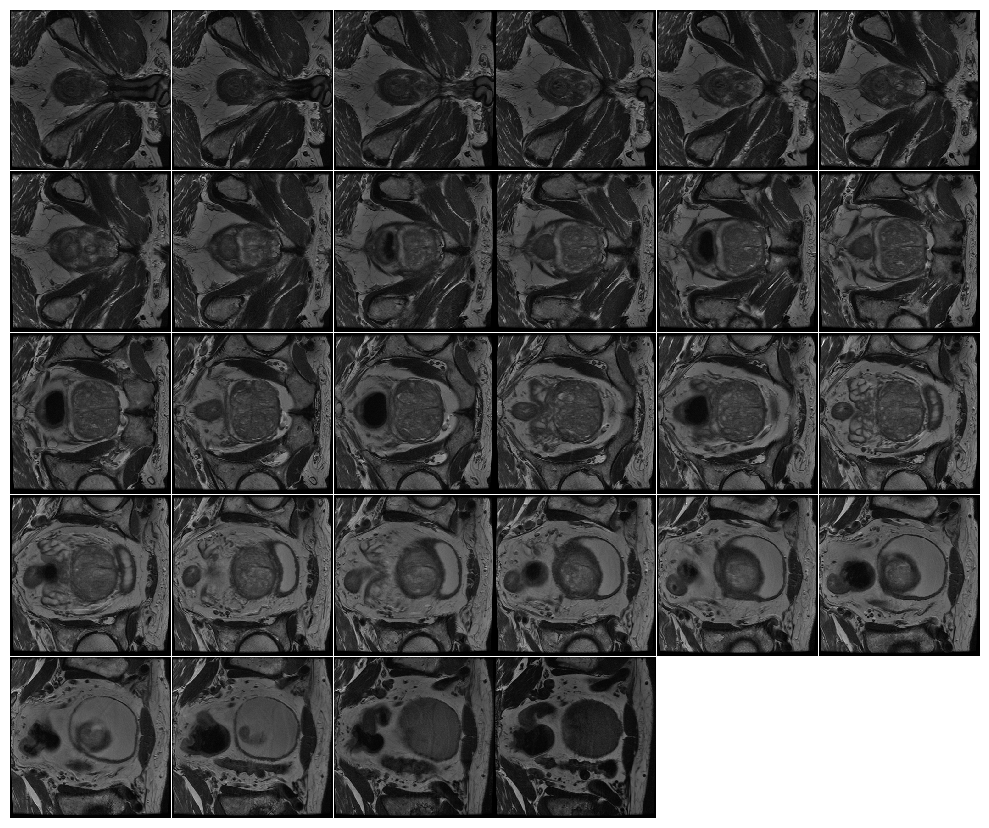

In [120]:
monai.visualize.matshow3d(t2w_image, cmap="gray",channel_dim=0,frame_dim=-1,show=True)
plt.show()

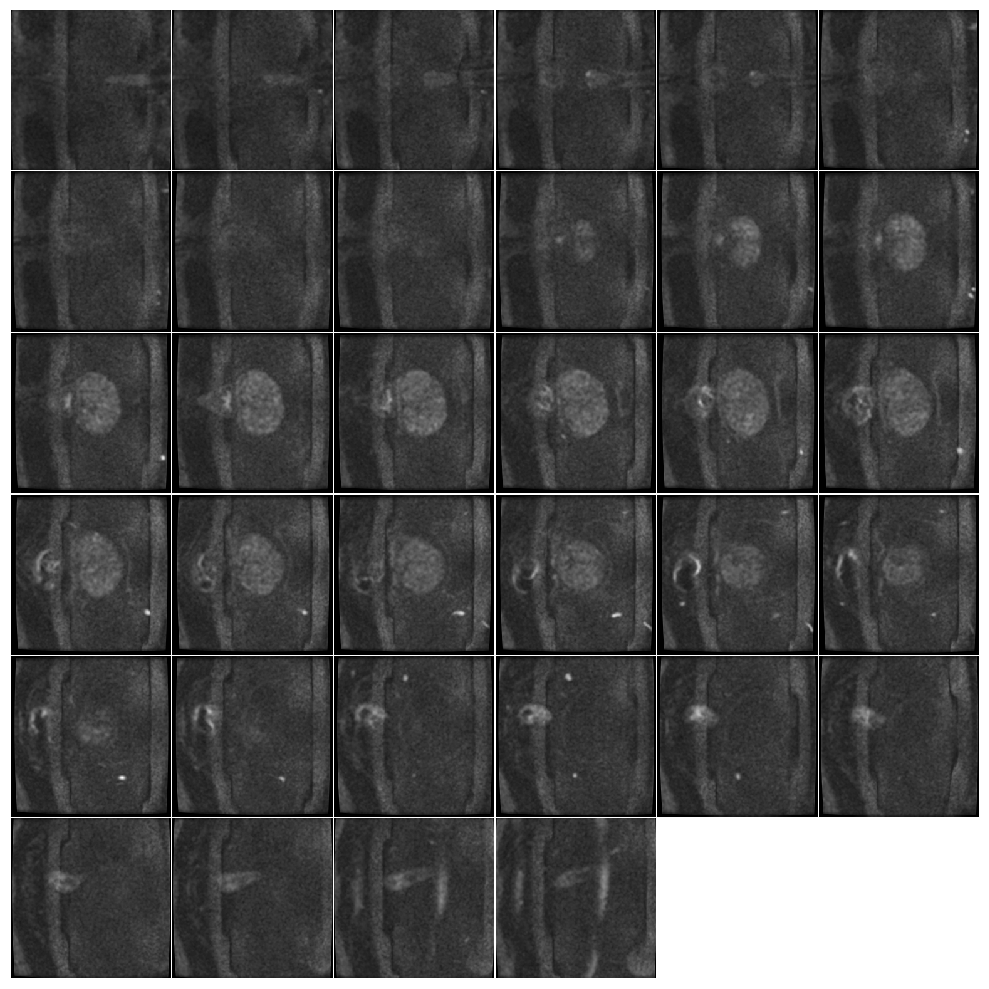

(<Figure size 1000x1000 with 1 Axes>,
 array([[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 6.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 8.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        ...,
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]], dtype=float32))

In [48]:
monai.visualize.matshow3d(dwi_image[0:1], cmap="gray",channel_dim=0,frame_dim=-1,show=True)

In [449]:
association_list=[]
for i,row in t2w_axial.iterrows():
    subject = row['subject']
    session = row['session']

    sub_dwi_df = dwi_df[(dwi_df['subject'] == subject) & (dwi_df['session'] == session)].reset_index(drop=True)
    sub_adc_df = adc_df[(adc_df['subject'] == subject) & (adc_df['session'] == session)].reset_index(drop=True)
    association_list.append({'subject': subject, 'session': session, 'image_t2': row['image']})
    if not sub_dwi_df.empty:
        
        times=[]

        adquisition_time_t2 = datetime.combine(datetime.min, row['AcquisitionTime'])
        t2w_image_path = os.path.join(path, t2w_df.subject[index], t2w_df.session[index],'mim-mr','anat', t2w_df.image[index])
        t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
        #print(t2w_image.shape)
        image_t2_slices = t2w_image.shape[-1]
        images_dwi_dict ={}
        for i, dwi_row in sub_dwi_df.iterrows():
            dwi_image_path = os.path.join(path, dwi_row['subject'], dwi_row['session'],'mim-mr','dwi', dwi_row['image'])
            dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)
            #print(dwi_image.shape)
            image_dwi_slices = dwi_image.shape[-1]
            adquisition_time_dwi = datetime.combine(datetime.min, dwi_row['AcquisitionTime'])
            #if abs(image_t2_slices - image_dwi_slices)<5:
                #times.append(abs(adquisition_time_t2-adquisition_time_dwi).total_seconds())
            bvalue = max(dwi_protocols[dwi_row['protocol_association']])
            images_dwi_dict.update({f'image_dwi_b{bvalue}': dwi_row['image']})


        #if times:
        association_list[-1].update(images_dwi_dict)
    
    if not sub_adc_df.empty:
        images_adc_dict ={}
        for i, adc_row in sub_adc_df.iterrows():

            if 'derivative' in adc_row['modality']:

                adc_image_path = os.path.join(derivatives_path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image'])
                adc_image = monai.transforms.LoadImage(ensure_channel_first=True)(adc_image_path)
                image_adc_slices = adc_image.shape[-1]
                adquisition_time_adc = datetime.combine(datetime.min, adc_row['AcquisitionTime'])
                if abs(image_t2_slices - image_adc_slices)<5:
                    bvalue = max(adc_row['bvalues']) if isinstance(adc_row['bvalues'],list) else 0
                    images_adc_dict.update({f'image_adc_b{bvalue}': adc_row['image'], f'adc_b{bvalue}_derivative': True})
            else:
                adc_image_path = os.path.join(path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image'])
                adc_image = monai.transforms.LoadImage(ensure_channel_first=True)(adc_image_path)
                image_adc_slices = adc_image.shape[-1]
                adquisition_time_adc = datetime.combine(datetime.min, adc_row['AcquisitionTime'])
                #if abs(image_t2_slices - image_adc_slices)<5:
                bvalue = max(adc_row['bvalues']) if isinstance(adc_row['bvalues'],list) else 0
                images_adc_dict.update({f'image_adc_b{bvalue}': adc_row['image'], f'adc_b{bvalue}_derivative': False})

        association_list[-1].update(images_adc_dict)

    # if i==3:
    #     break

association_df = pd.DataFrame(association_list)
association_df = association_df.sort_index(axis=1,ascending=False)

In [450]:
association_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
210  sub-000092  ses-000092   
211  sub-000092  ses-000092   
212  sub-000003  ses-000003   
213  sub-000111  ses-000111   
214  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-p_vp-ax...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
210  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
211  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
212  sub-000003_ses-000003_acq-fse_run-10_bp-a_vp-a...   
213  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
214  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                        image_dwi_b800  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
..                                                 ...   
210                                                NaN   
211                                                NaN   
212                                                NaN   
213                                                NaN   
214                                                NaN   

                                       image_dwi_b2000 image_dwi_b1800  \
0    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
1    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
2    sub-000066_ses-000066_acq-bvalue_run-12_bp-p_v...             NaN   
3                                                  NaN             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
210  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
211  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
212                                                NaN             NaN   
213  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...             NaN   
214  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...             NaN   

                                       image_dwi_b1500  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
210  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
211  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
212  sub-000003_ses-000003_acq-bvalue_run-12_bp-a_v...   
213  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...   
214  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...   

                                       image_dwi_b1000  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
210  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
211  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
212                                                NaN   
213  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...   
214  sub-000120_s

In [451]:
adc_row = association_df[association_df.image_adc_b0.isnull() == False].reset_index(drop=True).iloc[0]
adc_image_path = os.path.join(path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image_adc_b0'])


In [452]:
association_df[association_df.image_adc_b0.isnull() == False]

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
6    sub-000179  ses-000179   
8    sub-000176  ses-000176   
..          ...         ...   
201  sub-000128  ses-000128   
202  sub-000128  ses-000128   
207  sub-000173  ses-000173   
208  sub-000173  ses-000173   
209  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
6    sub-000179_ses-000179_acq-fse_run-501_bp-p_vp-...   
8    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
..                                                 ...   
201  sub-000128_ses-000128_acq-blade_run-12001_bp-p...   
202  sub-000128_ses-000128_acq-blade_run-9001_bp-p_...   
207  sub-000173_ses-000173_acq-propeller_run-700_bp...   
208  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   
209  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   

                                        image_dwi_b800  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
6                                                  NaN   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
201                                                NaN   
202                                                NaN   
207  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
208  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
209  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   

                                       image_dwi_b2000 image_dwi_b1800  \
3                                                  NaN             NaN   
4                                                  NaN             NaN   
5                                                  NaN             NaN   
6    sub-000179_ses-000179_acq-bvalue_run-701_bp-p_...             NaN   
8                                                  NaN             NaN   
..                                                 ...             ...   
201                                                NaN             NaN   
202                                                NaN             NaN   
207                                                NaN             NaN   
208                                                NaN             NaN   
209                                                NaN             NaN   

    image_dwi_b1500 image_dwi_b1000 image_adc_b2000 image_adc_b1500  \
3               NaN             NaN             NaN             NaN   
4               NaN             NaN             NaN             NaN   
5               NaN             NaN             NaN             NaN   
6               NaN             NaN             NaN             NaN   
8               NaN             NaN             NaN             NaN   
..              ...             ...             ...             ...   
201             NaN             NaN             NaN             NaN   
202             NaN             NaN             NaN             NaN   
207             NaN             NaN             NaN             NaN   
208             NaN             NaN             NaN             NaN   
209             NaN             NaN             NaN             NaN   

    image_adc_b1000                                       image_adc_b0  \
3               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...   
4               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...   
5               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...   
6               NaN  sub-000179_ses-000179_acq-adc_run-703_bp-p_vp-...   
8               NaN  sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...   
..              ...                                    

In [453]:
association_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               215 non-null    object
 1   session               215 non-null    object
 2   image_t2              215 non-null    object
 3   image_dwi_b800        73 non-null     object
 4   image_dwi_b2000       109 non-null    object
 5   image_dwi_b1800       1 non-null      object
 6   image_dwi_b1500       111 non-null    object
 7   image_dwi_b1000       103 non-null    object
 8   image_adc_b2000       94 non-null     object
 9   image_adc_b1500       93 non-null     object
 10  image_adc_b1000       85 non-null     object
 11  image_adc_b0          96 non-null     object
 12  adc_b2000_derivative  94 non-null     object
 13  adc_b1500_derivative  93 non-null     object
 14  adc_b1000_derivative  85 non-null     object
 15  adc_b0_derivative     96 non-null     ob

## Add Clinical Variables

In [454]:
validation = pd.read_csv('Prostate_Cancer_TFM/Files/Own_data/Validation_Clinical_Variables.tsv',sep='\t')
validation['subject_mids'] = validation['label_subject'].apply(lambda x: f"sub-{x:06d}")
validation['session_mids'] = validation['label_session'].apply(lambda x: f"ses-{x:06d}")

In [455]:
validation

project   dep      CRC  label_subject  label_session    ED  AF   TB  TR  \
0    p0042021   7.0  90400.0              1              1  77.0 NaN  1.0 NaN   
1    p0042021   2.0   1503.0              2              2  57.0 NaN  NaN NaN   
2    p0042021   7.0  90400.0              3              3  68.0 NaN  2.0 NaN   
3    p0042021   7.0  90400.0              4              4  51.0 NaN  2.0 NaN   
4    p0042021   7.0  90400.0              5              5  71.0 NaN  NaN NaN   
..        ...   ...      ...            ...            ...   ...  ..  ...  ..   
187  p0042021   2.0   1503.0            188            188  63.0 NaN  NaN NaN   
188  p0042021   5.0    977.0            189            189  77.0 NaN  NaN NaN   
189  p0042021   2.0   1503.0            190            190  76.0 NaN  NaN NaN   
190  p0042021  17.0   1234.0            191            191  66.0 NaN  NaN NaN   
191  p0042021   2.0   1503.0            192            192  65.0 NaN  NaN NaN   

       PSA  ...  csPC  F_nacimiento        F_RM F_TACTO_RECTAL       F_PSA  \
0    5.040  ...   0.0    1934-10-02  2012-07-04            NaN  2012-02-19   
1      NaN  ...   1.0    1958-08-10  2015-10-18            NaN         NaN   
2    2.320  ...   1.0    1945-01-02  2014-03-07            NaN  2014-01-24   
3    0.098  ...   0.0    1964-08-13  2017-03-24            NaN  2017-02-21   
4      NaN  ...   NaN    1944-02-16  2015-06-13            NaN         NaN   
..     ...  ...   ...           ...         ...            ...         ...   
187    NaN  ...   NaN    1950-11-21  2014-11-20            NaN         NaN   
188  4.520  ...   1.0    1933-07-14  2010-09-30            NaN  2010-07-04   
189    NaN  ...   0.0    1938-11-04  2014-12-11            NaN         NaN   
190  6.060  ...   0.0    1948-06-18  2015-04-12            NaN  2015-03-28   
191    NaN  ...   1.0    1951-11-20  2017-02-15            NaN         NaN   

         F_csPC Time_diff_TB VP_segmentation subject_mids  session_mids  
0    2012-12-12   2012-03-11             NaN   sub-000001    ses-000001  
1    2017-07-20          NaN             NaN   sub-000002    ses-000002  
2    2014-05-16   2013-12-29        0.000000   sub-000003    ses-000003  
3    2017-06-22   2016-03-17        0.000000   sub-000004    ses-000004  
4           NaN          NaN        0.020508   sub-000005    ses-000005  
..          ...          ...             ...          ...           ...  
187         NaN          NaN             NaN   sub-000188    ses-000188  
188  2011-03-19          NaN       24.695920   sub-000189    ses-000189  
189  2014-12-21          NaN             NaN   sub-000190    ses-000190  
190  2019-01-26          NaN       30.268736   sub-000191    ses-000191  
191  2017-04-08          NaN             NaN   sub-000192    ses-000192  

[192 rows x 22 columns]

In [456]:
# Merge dataframes on specified columns
complete_df = pd.merge(association_df, validation, right_on=['subject_mids', 'session_mids'], left_on=['subject', 'session'])

# Drop specified columns
columns_to_drop = ['label_subject', 'label_session', 'Time_diff_TB', 'subject_mids', 'session_mids', 'project', 'CRC','F_TACTO_RECTAL','F_PSA','F_csPC']
complete_df = complete_df.drop(columns=columns_to_drop)

In [457]:
complete_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
208  sub-000092  ses-000092   
209  sub-000092  ses-000092   
210  sub-000003  ses-000003   
211  sub-000111  ses-000111   
212  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-p_vp-ax...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
208  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
209  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
210  sub-000003_ses-000003_acq-fse_run-10_bp-a_vp-a...   
211  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
212  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                        image_dwi_b800  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
..                                                 ...   
208                                                NaN   
209                                                NaN   
210                                                NaN   
211                                                NaN   
212                                                NaN   

                                       image_dwi_b2000 image_dwi_b1800  \
0    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
1    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
2    sub-000066_ses-000066_acq-bvalue_run-12_bp-p_v...             NaN   
3                                                  NaN             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
208  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
209  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
210                                                NaN             NaN   
211  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...             NaN   
212  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...             NaN   

                                       image_dwi_b1500  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
208  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
210  sub-000003_ses-000003_acq-bvalue_run-12_bp-a_v...   
211  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...   
212  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...   

                                       image_dwi_b1000  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
208  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
210                                                NaN   
211  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...   
212  sub-000120_s

In [487]:
complete_df.columns

Index(['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b2000', 'image_adc_b1500', 'image_adc_b1000', 'image_adc_b0',
       'adc_b2000_derivative', 'adc_b1500_derivative', 'adc_b1000_derivative',
       'adc_b0_derivative', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR',
       'csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation'],
      dtype='object')

In [488]:
complete_df.loc[~complete_df["image_adc_b0"].isna()][['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b2000', 'image_adc_b1500', 'image_adc_b1000', 'image_adc_b0']]

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
6    sub-000179  ses-000179   
8    sub-000176  ses-000176   
..          ...         ...   
199  sub-000128  ses-000128   
200  sub-000128  ses-000128   
205  sub-000173  ses-000173   
206  sub-000173  ses-000173   
207  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
6    sub-000179_ses-000179_acq-fse_run-501_bp-p_vp-...   
8    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
..                                                 ...   
199  sub-000128_ses-000128_acq-blade_run-12001_bp-p...   
200  sub-000128_ses-000128_acq-blade_run-9001_bp-p_...   
205  sub-000173_ses-000173_acq-propeller_run-700_bp...   
206  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   
207  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   

                                        image_dwi_b800  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
6                                                  NaN   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
199                                                NaN   
200                                                NaN   
205  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
206  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
207  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   

                                       image_dwi_b2000 image_dwi_b1800  \
3                                                  NaN             NaN   
4                                                  NaN             NaN   
5                                                  NaN             NaN   
6    sub-000179_ses-000179_acq-bvalue_run-701_bp-p_...             NaN   
8                                                  NaN             NaN   
..                                                 ...             ...   
199                                                NaN             NaN   
200                                                NaN             NaN   
205                                                NaN             NaN   
206                                                NaN             NaN   
207                                                NaN             NaN   

    image_dwi_b1500 image_dwi_b1000 image_adc_b2000 image_adc_b1500  \
3               NaN             NaN             NaN             NaN   
4               NaN             NaN             NaN             NaN   
5               NaN             NaN             NaN             NaN   
6               NaN             NaN             NaN             NaN   
8               NaN             NaN             NaN             NaN   
..              ...             ...             ...             ...   
199             NaN             NaN             NaN             NaN   
200             NaN             NaN             NaN             NaN   
205             NaN             NaN             NaN             NaN   
206             NaN             NaN             NaN             NaN   
207             NaN             NaN             NaN             NaN   

    image_adc_b1000                                       image_adc_b0  
3               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  
4               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  
5               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  
6               NaN  sub-000179_ses-000179_acq-adc_run-703_bp-p_vp-...  
8               NaN  sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  
..              ...                                          

## Check Images Associated

In [495]:
img_columns = ['t2','dwi','adc']

transforms = monai.transforms.Compose([
    monai.transforms.LoadImaged(keys=img_columns, image_only=True,ensure_channel_first=True),
    monai.transforms.DataStatsd(keys=img_columns,),
    monai.transforms.ResampleToMatchd(
        keys=["adc", "dwi"],
        key_dst="t2",
        mode=("bilinear", "bilinear"),
    ),
    monai.transforms.SplitDimd(
        keys=["dwi"],
        keepdim=True,
    ),
    # Resample images to t2 dimension
    # monai.transforms.Resized(
    #     keys=img_columns,
    #     spatial_size=eval(input_shape),
    #     mode=("trilinear", "trilinear", "trilinear", "nearest"),
    # ),  # SAMUNETR: Reshape to have the same dimension
    monai.transforms.ScaleIntensityd(keys=['t2','dwi_0','dwi_1','adc'], minv=0.0, maxv=1.0, allow_missing_keys=True),
    # monai.transforms.NormalizeIntensityd(keys=img_columns),
    monai.transforms.ConcatItemsd(keys=['t2','dwi_0','adc'], name="image", dim=0),
])

In [500]:
index=207
images_dict = {
    't2': os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','anat', complete_df.image_t2[index]),
    'dwi': os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_dwi_b800[index]),
    'adc': os.path.join(derivatives_path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_adc_b0[index]) if complete_df.adc_b0_derivative[index] else os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_adc_b0[index])
    }

In [501]:
images = transforms(images_dict)

Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 512, 512, 28])
Value range: (0.0, 1950.0)
Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([2, 256, 256, 31])
Value range: (0.0, 1836.0)
Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 256, 256, 21])
Value range: (-256.0, 32701.0)


In [502]:
print("T2w shape: ", images['t2'].shape)
print("DWI shape: ", images['dwi_1'].shape)
print("ADC shape: ", images['adc'].shape)
print("Concat shape: ", images['image'].shape)

T2w shape:  torch.Size([1, 512, 512, 28])
DWI shape:  torch.Size([1, 512, 512, 28])
ADC shape:  torch.Size([1, 512, 512, 28])
Concat shape:  torch.Size([3, 512, 512, 28])


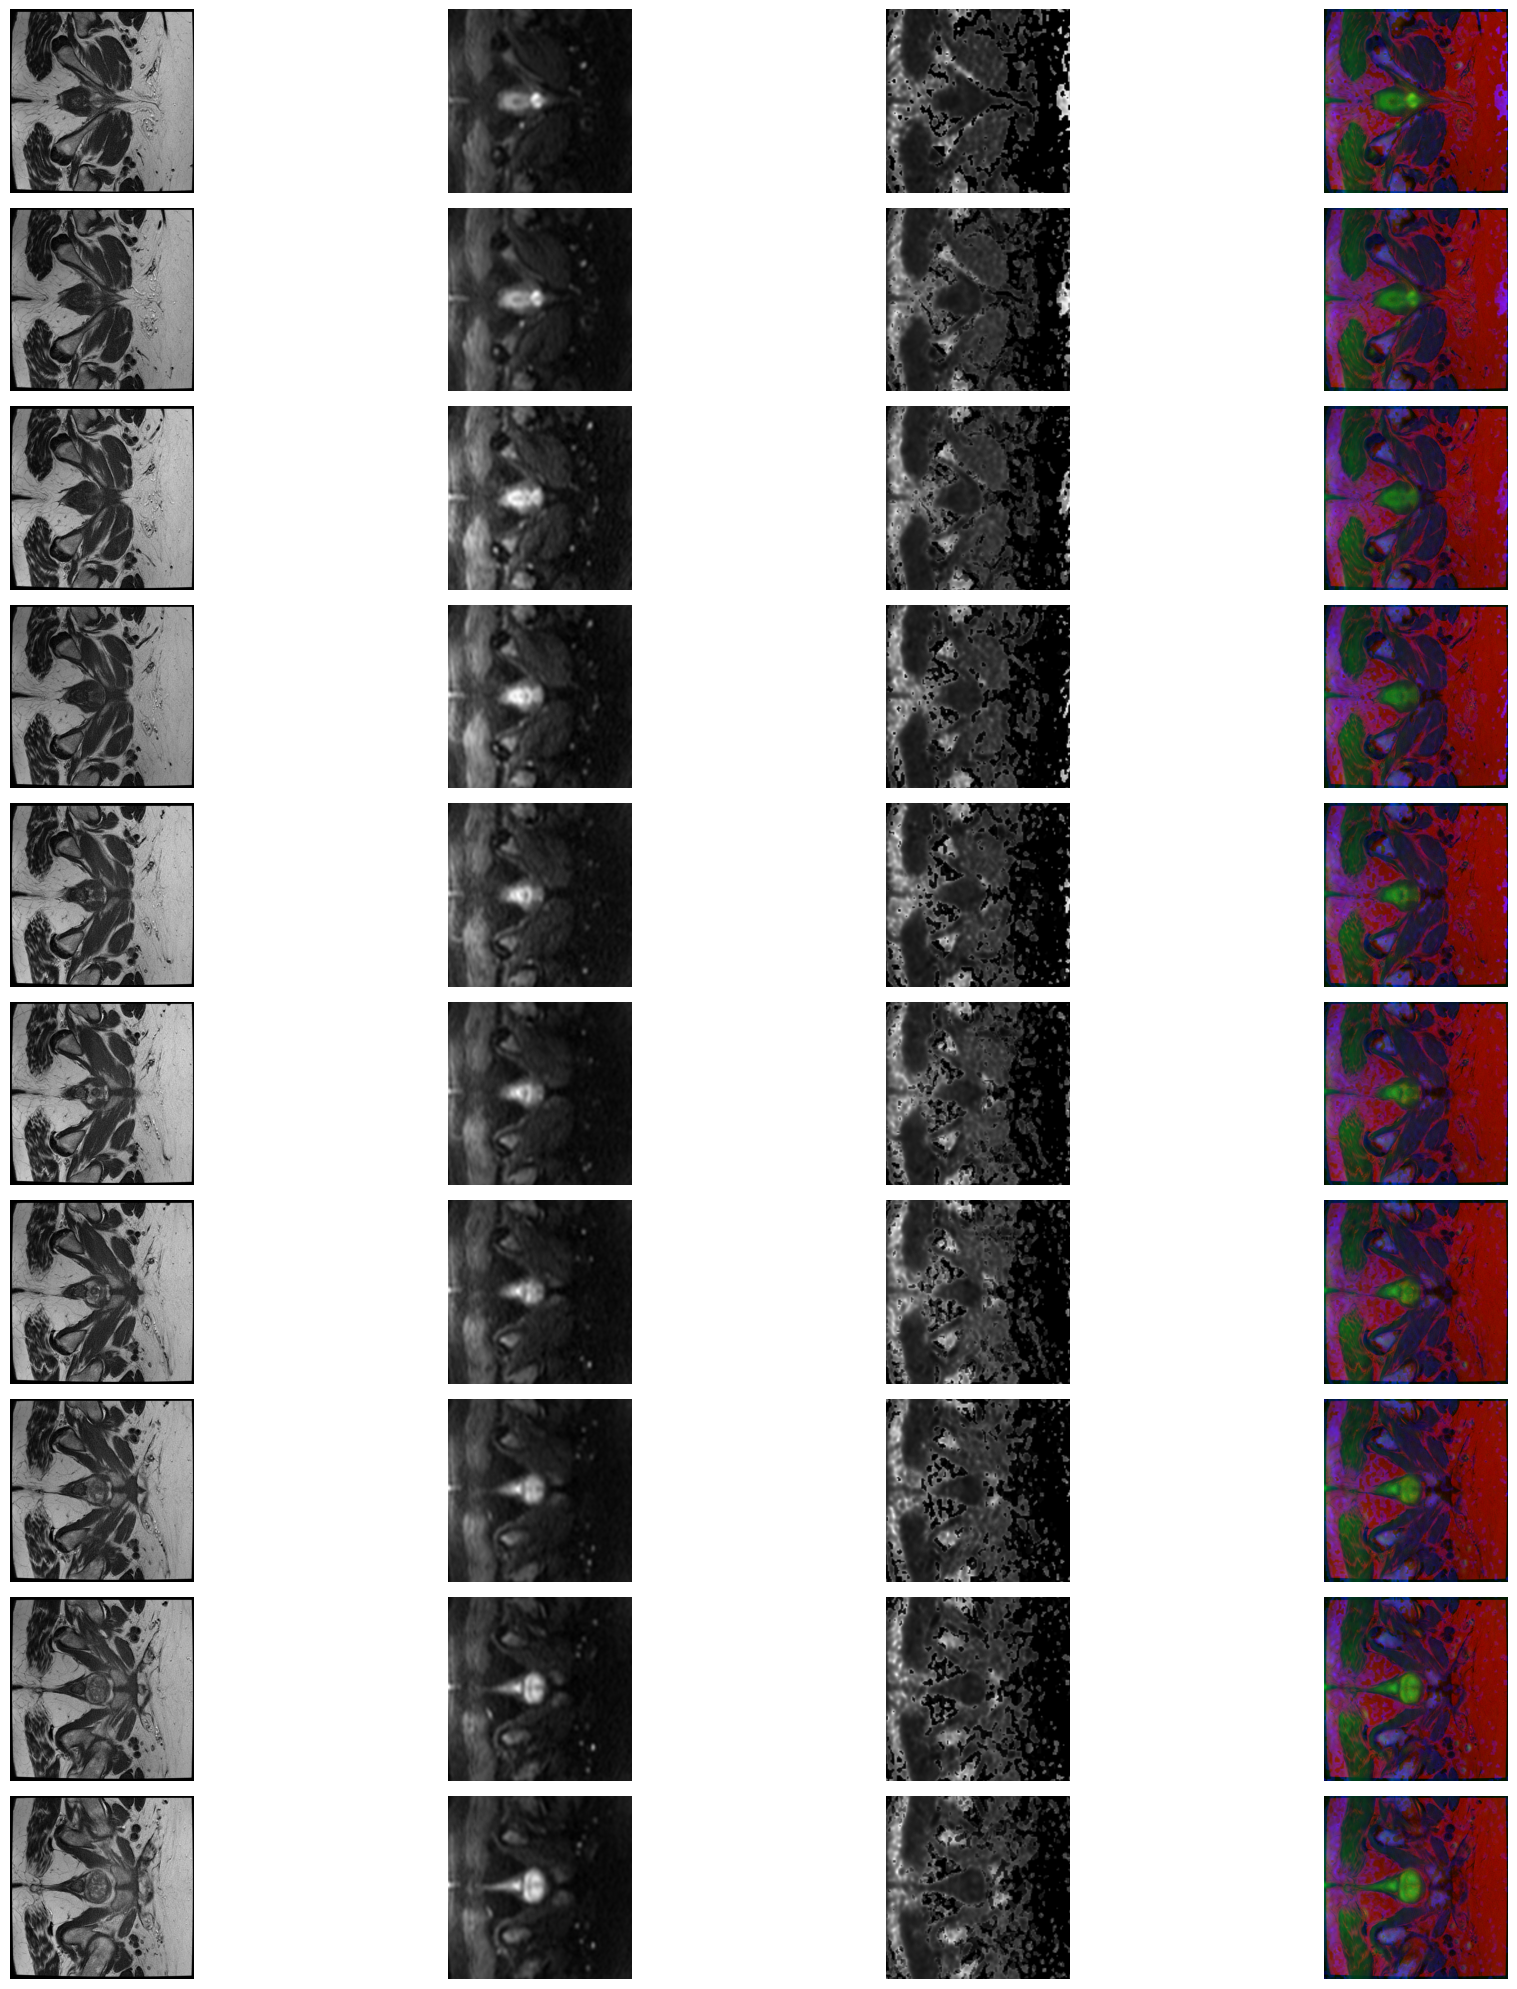

In [504]:
n_rows = 10
fig, axs = plt.subplots(n_rows, 4, figsize=(20,20))
for i in range(n_rows):
    axs[i,0].imshow(images['t2'][0,:,:,i], cmap='gray')
    axs[i,0].axis("off")
    axs[i,1].imshow(images['dwi_0'][0,:,:,i], cmap='gray')
    axs[i,1].axis("off")
    axs[i,2].imshow(images['adc'][0,:,:,i], cmap='gray')
    axs[i,2].axis("off")
    axs[i,3].imshow(images['image'][:,:,:,i].permute(1,2,0), cmap='gray')
    axs[i,3].axis("off")
fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

In [505]:
complete_df.to_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation.csv',index=False)

## Divide tables for training

In [556]:
complete_df = pd.read_csv("Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation.csv")
complete_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
208  sub-000092  ses-000092   
209  sub-000092  ses-000092   
210  sub-000003  ses-000003   
211  sub-000111  ses-000111   
212  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-p_vp-ax...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
208  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
209  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
210  sub-000003_ses-000003_acq-fse_run-10_bp-a_vp-a...   
211  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
212  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                        image_dwi_b800  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
..                                                 ...   
208                                                NaN   
209                                                NaN   
210                                                NaN   
211                                                NaN   
212                                                NaN   

                                       image_dwi_b2000 image_dwi_b1800  \
0    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
1    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...             NaN   
2    sub-000066_ses-000066_acq-bvalue_run-12_bp-p_v...             NaN   
3                                                  NaN             NaN   
4                                                  NaN             NaN   
..                                                 ...             ...   
208  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
209  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...             NaN   
210                                                NaN             NaN   
211  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...             NaN   
212  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...             NaN   

                                       image_dwi_b1500  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
208  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
210  sub-000003_ses-000003_acq-bvalue_run-12_bp-a_v...   
211  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...   
212  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...   

                                       image_dwi_b1000  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-p_v...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
208  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
210                                                NaN   
211  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...   
212  sub-000120_s

In [557]:
complete_df.columns

Index(['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b2000', 'image_adc_b1500', 'image_adc_b1000', 'image_adc_b0',
       'adc_b2000_derivative', 'adc_b1500_derivative', 'adc_b1000_derivative',
       'adc_b0_derivative', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR',
       'csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation'],
      dtype='object')

In [558]:
dwib800_adcb0 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_adc_b0', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib800_adcb0.dropna(subset=['image_dwi_b800', 'image_adc_b0'],inplace=True)
dwib800_adcb0.rename(columns={'image_dwi_b800': 'image_dwi', 'image_adc_b0': 'image_adc'},inplace=True)
dwib800_adcb0

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
8    sub-000176  ses-000176   
9    sub-000176  ses-000176   
..          ...         ...   
185  sub-000191  ses-000191   
186  sub-000191  ses-000191   
205  sub-000173  ses-000173   
206  sub-000173  ses-000173   
207  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
8    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
9    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
185  sub-000191_ses-000191_acq-propeller_run-5_bp-a...   
186  sub-000191_ses-000191_acq-propeller_run-8_bp-a...   
205  sub-000173_ses-000173_acq-propeller_run-700_bp...   
206  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   
207  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   

                                             image_dwi  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
9    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
185  sub-000191_ses-000191_acq-bvalue_run-6_bp-a_vp...   
186  sub-000191_ses-000191_acq-bvalue_run-6_bp-a_vp...   
205  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
206  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   
207  sub-000173_ses-000173_acq-bvalue_run-5_bp-a_vp...   

                                             image_adc   dep    ED  AF   TB  \
3    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
4    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
5    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
8    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
9    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
185  sub-000191_ses-000191_acq-adc_run-901_bp-a_vp-...  17.0  66.0 NaN  NaN   
186  sub-000191_ses-000191_acq-adc_run-901_bp-a_vp-...  17.0  66.0 NaN  NaN   
205  sub-000173_ses-000173_acq-adc_run-801_bp-a_vp-...  17.0  72.0 NaN  1.0   
206  sub-000173_ses-000173_acq-adc_run-801_bp-a_vp-...  17.0  72.0 NaN  1.0   
207  sub-000173_ses-000173_acq-adc_run-801_bp-a_vp-...  17.0  72.0 NaN  1.0   

     TR    PSA         VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
3   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
4   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
5   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
8   NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745  
9   NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745  
..   ..    ...        ...  ...   ...          ...         ...              ...  
185 NaN   6.06  31.478720  3.0   0.0   1948-06-18  2015-04-12        30.268736  
186 NaN   6.06  31.478720  3.0   0.0   1948-06-18  2015-04-12        30.268736  
205 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  
206 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  
207 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  

[73 rows x 17 columns]

In [559]:
dwib1000_adcb1000 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1000', 'image_adc_b1000', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1000_adcb1000.dropna(subset=['image_dwi_b1000', 'image_adc_b1000'],inplace=True)
dwib1000_adcb1000.rename(columns={'image_dwi_b1000': 'image_dwi', 'image_adc_b1000': 'image_adc'},inplace=True)
dwib1000_adcb1000

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
7    sub-000108  ses-000108   
11   sub-000103  ses-000103   
16   sub-000015  ses-000015   
..          ...         ...   
204  sub-000107  ses-000107   
208  sub-000092  ses-000092   
209  sub-000092  ses-000092   
211  sub-000111  ses-000111   
212  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
7    sub-000108_ses-000108_acq-fse_run-9_bp-a_vp-ax...   
11   sub-000103_ses-000103_acq-fse_run-8_bp-a_vp-ax...   
16   sub-000015_ses-000015_acq-fse_run-5_bp-p_vp-ax...   
..                                                 ...   
204  sub-000107_ses-000107_acq-fse_run-10_bp-a_vp-a...   
208  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
209  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
211  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
212  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...   
7    sub-000108_ses-000108_acq-bvalue_run-11_bp-a_v...   
11   sub-000103_ses-000103_acq-bvalue_run-10_bp-a_v...   
16   sub-000015_ses-000015_acq-bvalue_run-10_bp-p_v...   
..                                                 ...   
204  sub-000107_ses-000107_acq-bvalue_run-12_bp-a_v...   
208  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...   
211  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...   
212  sub-000120_ses-000120_acq-bvalue_run-10_bp-a_v...   

                                             image_adc  dep    ED  AF   TB  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...  7.0  70.0 NaN  3.0   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...  7.0  70.0 NaN  3.0   
7    sub-000108_ses-000108_acq-bvalue_run-11_bp-a_v...  7.0  74.0 NaN  NaN   
11   sub-000103_ses-000103_acq-bvalue_run-10_bp-a_v...  7.0  67.0 NaN  NaN   
16   sub-000015_ses-000015_acq-bvalue_run-10_bp-p_v...  7.0  70.0 NaN  NaN   
..                                                 ...  ...   ...  ..  ...   
204  sub-000107_ses-000107_acq-bvalue_run-12_bp-a_v...  7.0  56.0 NaN  2.0   
208  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...  7.0  69.0 NaN  2.0   
209  sub-000092_ses-000092_acq-bvalue_run-14_bp-p_v...  7.0  69.0 NaN  2.0   
211  sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...  7.0  62.0 NaN  NaN   
212  sub-000120_ses-000120_acq-bvalue_run-10_bp-a_v...  7.0  69.0 NaN  1.0   

     TR   PSA          VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
1   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
7   NaN   NaN   99.000000  NaN   0.0   1941-10-09  2016-03-27        66.821191  
11  NaN   NaN  115.596000  5.0   NaN   1948-12-04  2015-12-05       123.743555  
16  NaN   NaN         NaN  NaN   NaN   1945-07-24  2016-02-18        28.519533  
..   ..   ...         ...  ...   ...          ...         ...              ...  
204 NaN  6.98         NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707  
208 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
209 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
211 NaN   NaN   58.000000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
212 NaN  5.84   34.000000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[85 rows x 17 columns]

In [560]:
dwib1500_adcb1500 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1500', 'image_adc_b1500', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1500_adcb1500.dropna(subset=['image_dwi_b1500', 'image_adc_b1500'],inplace=True)
dwib1500_adcb1500.rename(columns={'image_dwi_b1500': 'image_dwi', 'image_adc_b1500': 'image_adc'},inplace=True)
dwib1500_adcb1500

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
7    sub-000108  ses-000108   
11   sub-000103  ses-000103   
16   sub-000015  ses-000015   
..          ...         ...   
208  sub-000092  ses-000092   
209  sub-000092  ses-000092   
210  sub-000003  ses-000003   
211  sub-000111  ses-000111   
212  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
7    sub-000108_ses-000108_acq-fse_run-9_bp-a_vp-ax...   
11   sub-000103_ses-000103_acq-fse_run-8_bp-a_vp-ax...   
16   sub-000015_ses-000015_acq-fse_run-5_bp-p_vp-ax...   
..                                                 ...   
208  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
209  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
210  sub-000003_ses-000003_acq-fse_run-10_bp-a_vp-a...   
211  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
212  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...   
7    sub-000108_ses-000108_acq-bvalue_run-12_bp-a_v...   
11   sub-000103_ses-000103_acq-bvalue_run-11_bp-a_v...   
16   sub-000015_ses-000015_acq-bvalue_run-11_bp-p_v...   
..                                                 ...   
208  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-15_bp-p_v...   
210  sub-000003_ses-000003_acq-bvalue_run-12_bp-a_v...   
211  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...   
212  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...   

                                             image_adc  dep    ED  AF   TB  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...  7.0  70.0 NaN  3.0   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...  7.0  70.0 NaN  3.0   
7    sub-000108_ses-000108_acq-bvalue_run-12_bp-a_v...  7.0  74.0 NaN  NaN   
11   sub-000103_ses-000103_acq-bvalue_run-11_bp-a_v...  7.0  67.0 NaN  NaN   
16   sub-000015_ses-000015_acq-bvalue_run-11_bp-p_v...  7.0  70.0 NaN  NaN   
..                                                 ...  ...   ...  ..  ...   
208  sub-000092_ses-000092_acq-bvalue_run-11_bp-p_v...  7.0  69.0 NaN  2.0   
209  sub-000092_ses-000092_acq-bvalue_run-11_bp-p_v...  7.0  69.0 NaN  2.0   
210  sub-000003_ses-000003_acq-bvalue_run-12_bp-a_v...  7.0  68.0 NaN  2.0   
211  sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...  7.0  62.0 NaN  NaN   
212  sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...  7.0  69.0 NaN  1.0   

     TR   PSA          VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
1   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
7   NaN   NaN   99.000000  NaN   0.0   1941-10-09  2016-03-27        66.821191  
11  NaN   NaN  115.596000  5.0   NaN   1948-12-04  2015-12-05       123.743555  
16  NaN   NaN         NaN  NaN   NaN   1945-07-24  2016-02-18        28.519533  
..   ..   ...         ...  ...   ...          ...         ...              ...  
208 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
209 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
210 NaN  2.32         NaN  NaN   1.0   1945-01-02  2014-03-07         0.000000  
211 NaN   NaN   58.000000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
212 NaN  5.84   34.000000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[93 rows x 17 columns]

In [561]:
dwib1800_adcb0 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1800', 'image_adc_b0', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1800_adcb0.dropna(subset=['image_dwi_b1800', 'image_adc_b0'],inplace=True)
dwib1800_adcb0.rename(columns={'image_dwi_b1800': 'image_dwi', 'image_adc_b0': 'image_adc'},inplace=True)
dwib1800_adcb0

Empty DataFrame
Columns: [subject, session, image_t2, image_dwi, image_adc, dep, ED, AF, TB, TR, PSA, VP, PIR, csPC, F_nacimiento, F_RM, VP_segmentation]
Index: []

In [562]:
dwib2000_adcb2000 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b2000', 'image_adc_b2000', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib2000_adcb2000.dropna(subset=['image_dwi_b2000', 'image_adc_b2000'],inplace=True)
dwib2000_adcb2000.rename(columns={'image_dwi_b2000': 'image_dwi', 'image_adc_b2000': 'image_adc'},inplace=True)
dwib2000_adcb2000

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
7    sub-000108  ses-000108   
11   sub-000103  ses-000103   
18   sub-000042  ses-000042   
..          ...         ...   
204  sub-000107  ses-000107   
208  sub-000092  ses-000092   
209  sub-000092  ses-000092   
211  sub-000111  ses-000111   
212  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...   
1    sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...   
7    sub-000108_ses-000108_acq-fse_run-9_bp-a_vp-ax...   
11   sub-000103_ses-000103_acq-fse_run-8_bp-a_vp-ax...   
18   sub-000042_ses-000042_acq-fse_run-11_bp-p_vp-a...   
..                                                 ...   
204  sub-000107_ses-000107_acq-fse_run-10_bp-a_vp-a...   
208  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
209  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
211  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
212  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...   
1    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...   
7    sub-000108_ses-000108_acq-bvalue_run-13_bp-a_v...   
11   sub-000103_ses-000103_acq-bvalue_run-12_bp-a_v...   
18   sub-000042_ses-000042_acq-bvalue_run-14_bp-p_v...   
..                                                 ...   
204  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   
208  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
209  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
211  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   
212  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   

                                             image_adc  dep    ED  AF   TB  \
0    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...  7.0  70.0 NaN  3.0   
1    sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...  7.0  70.0 NaN  3.0   
7    sub-000108_ses-000108_acq-bvalue_run-13_bp-a_v...  7.0  74.0 NaN  NaN   
11   sub-000103_ses-000103_acq-bvalue_run-12_bp-a_v...  7.0  67.0 NaN  NaN   
18   sub-000042_ses-000042_acq-bvalue_run-14_bp-p_v...  7.0  61.0 NaN  NaN   
..                                                 ...  ...   ...  ..  ...   
204  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...  7.0  56.0 NaN  2.0   
208  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...  7.0  69.0 NaN  2.0   
209  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...  7.0  69.0 NaN  2.0   
211  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...  7.0  62.0 NaN  NaN   
212  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...  7.0  69.0 NaN  1.0   

     TR   PSA          VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
1   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
7   NaN   NaN   99.000000  NaN   0.0   1941-10-09  2016-03-27        66.821191  
11  NaN   NaN  115.596000  5.0   NaN   1948-12-04  2015-12-05       123.743555  
18  NaN   NaN         NaN  NaN   NaN   1951-04-15  2012-09-10        50.503125  
..   ..   ...         ...  ...   ...          ...         ...              ...  
204 NaN  6.98         NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707  
208 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
209 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
211 NaN   NaN   58.000000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
212 NaN  5.84   34.000000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[94 rows x 17 columns]

In [563]:
unified_complete_df = pd.concat([dwib800_adcb0, dwib1000_adcb1000, dwib1500_adcb1500, dwib2000_adcb2000],ignore_index=True)
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
340  sub-000107  ses-000107   
341  sub-000092  ses-000092   
342  sub-000092  ses-000092   
343  sub-000111  ses-000111   
344  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
4    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
340  sub-000107_ses-000107_acq-fse_run-10_bp-a_vp-a...   
341  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
342  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
343  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
344  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
340  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   
341  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
342  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
343  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   
344  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
340  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   7.0  56.0 NaN  2.0   
341  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
342  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
343  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   7.0  62.0 NaN  NaN   
344  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   7.0  69.0 NaN  1.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
..   ..    ...      ...  ...   ...          ...         ...              ...  
340 NaN   6.98      NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707  
341 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316  
342 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316  
343 NaN    NaN  58.0000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
344 NaN   5.84  34.0000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[345 rows x 17 columns]

In [38]:
unified_complete_df.loc[(unified_complete_df["csPC"] == 0.5) & (unified_complete_df["PIR"] == 5.0),"csPC"] = 1.0
unified_complete_df.drop(index=unified_complete_df.loc[unified_complete_df["csPC"] == 0.5].index,inplace=True)
unified_complete_df.dropna(subset=['csPC'],inplace=True)

In [39]:
unified_complete_df["csPC"].value_counts()

csPC
1.0    131
0.0    126
Name: count, dtype: int64

In [53]:
unified_complete_df.to_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation_Unified.csv',index=False)

In [1]:
from bimcv_aikit.data.genetic_train_test_split import separate_dataset

In [54]:
unified_complete_df = pd.read_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation_Unified.csv')

In [55]:
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
252  sub-000107  ses-000107   
253  sub-000092  ses-000092   
254  sub-000092  ses-000092   
255  sub-000111  ses-000111   
256  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
4    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
252  sub-000107_ses-000107_acq-fse_run-10_bp-a_vp-a...   
253  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
254  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
255  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
256  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
252  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   
253  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
254  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
255  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   
256  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
252  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   7.0  56.0 NaN  2.0   
253  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
254  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
255  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   7.0  62.0 NaN  NaN   
256  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   7.0  69.0 NaN  1.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  \
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
..   ..    ...      ...  ...   ...          ...         ...              ...   
252 NaN   6.98      NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707   
253 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316   
254 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316   
255 NaN    NaN  58.0000  4.0   1.0   1953-01-05  2015-06-24        44.452148   
256 NaN   5.84  34.0000  4.0   0.0   1945-06-17  2014-09-24        37.376660   

    partition  
0        test  
1       train  
2        test  
3       train  
4        test  
..        ...  
252     train  
253     train  
254     train  
255     train  
256      test  

[257 rows x 18 columns]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
y = unified_complete_df["csPC"]
X = unified_complete_df.drop(columns="csPC")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=np.array(y.values, dtype=int), random_state=42)

In [51]:
unified_complete_df.loc[X_train.index,"partition"] = "train"
unified_complete_df.loc[X_test.index,"partition"] = "test"

In [52]:
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
252  sub-000107  ses-000107   
253  sub-000092  ses-000092   
254  sub-000092  ses-000092   
255  sub-000111  ses-000111   
256  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-8_bp-a...   
4    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
252  sub-000107_ses-000107_acq-fse_run-10_bp-a_vp-a...   
253  sub-000092_ses-000092_acq-fse_run-8_bp-p_vp-ax...   
254  sub-000092_ses-000092_acq-fse_run-13_bp-p_vp-a...   
255  sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...   
256  sub-000120_ses-000120_acq-fse_run-8_bp-a_vp-ax...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-a_vp...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-a_vp...   
..                                                 ...   
252  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   
253  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
254  sub-000092_ses-000092_acq-bvalue_run-12_bp-p_v...   
255  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   
256  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-a_vp-...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-600_bp-a_vp-...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
252  sub-000107_ses-000107_acq-bvalue_run-14_bp-a_v...   7.0  56.0 NaN  2.0   
253  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
254  sub-000092_ses-000092_acq-bvalue_run-16_bp-p_v...   7.0  69.0 NaN  2.0   
255  sub-000111_ses-000111_acq-bvalue_run-12_bp-a_v...   7.0  62.0 NaN  NaN   
256  sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...   7.0  69.0 NaN  1.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  \
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
..   ..    ...      ...  ...   ...          ...         ...              ...   
252 NaN   6.98      NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707   
253 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316   
254 NaN   7.24   0.5200  NaN   0.0   1945-10-31  2014-10-02       149.049316   
255 NaN    NaN  58.0000  4.0   1.0   1953-01-05  2015-06-24        44.452148   
256 NaN   5.84  34.0000  4.0   0.0   1945-06-17  2014-09-24        37.376660   

    partition  
0        test  
1       train  
2        test  
3       train  
4        test  
..        ...  
252     train  
253     train  
254     train  
255     train  
256      test  

[257 rows x 18 columns]